# **Assignment 2: Sentiment Analysis**

*   **name**: Yaqi Zhang
*   **student number**: 1006584288

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import confusion_matrix
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from html.parser import HTMLParser

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [ ]:

os.chdir('/drive/My Drive/Colab Notebooks/1624 Assignment2')
df = pd.read_csv('Canadian_elections_2019.csv')
df.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


# **1. DATA CLEANING**

o All html tags and attributes (i.e., /<[^>]+>/) are removed. 

o Html character codes (i.e., &...;) are replaced with an ASCII equivalent. 

o All URLs are removed. 

o All characters in the text are in lowercase. 

o All stop words are removed. Be clear in what you consider as a stop word. 

o If a tweet is empty after pre-processing, it should be preserved as such

###**1.1 Data cleaning for Canadian elections dataset**

In [ ]:
for i in range(len(df)):
  t = df.iloc[i,2]
  t = t.lstrip('b')
  #All characters in the text are in lowercase.
  t = t.lower()
  #All html tags and attributes (i.e., /<[^>]+>/) are removed.
  t = re.sub('(/<[^>]+>/)', '', t)
  t = re.sub(r'\s*<.*?>', '', t)
  #All URLs are removed
  t = re.sub('(\s+\S+.[^\s]+/\S+)','',t)
  #Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
  t = HTMLParser().unescape(t)
  #stop words
  tokenizer = RegexpTokenizer(r'\w+')         
  b = tokenizer.tokenize(t)
  t = [word for word in b if word not in stopwords.words('english')]
  #stem
  ps = PorterStemmer()
  t = [ps.stem(word) for word in t]

  df.iloc[i,2] = t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  if sys.path[0] == '':


In [ ]:
df.to_csv('df.csv', index=False)

###**1.2 Data cleaning for sentiments dataset**

In [ ]:
df1 = pd.read_csv("Sentiment.csv", low_memory = False)
df1

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
...,...,...
133806,Positive,"@scottw Nice, I have the 20/20 but to be hones..."
133807,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich ...
133808,Negative,@amtrack i am sorry .... i love you tho and t...
133809,Positive,@RazorTV http://tinyurl.com/d96txo - Champions...


In [ ]:
df1.isnull().any()

sentiment    False
text          True
dtype: bool

In [ ]:
#Drop all the Nan 
df1 = df1.dropna(axis=0,how='any')

In [ ]:
df1['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
#Drop all the neutral sentiment data
df1=df1[~df1['sentiment'].isin(['Neutral'])]

In [ ]:
for i in range(len(df1)):
  t = df1.iloc[i,1]
  #All characters in the text are in lowercase.
  t = t.lower()
  #All html tags and attributes (i.e., /<[^>]+>/) are removed.
  t = re.sub('(/<[^>]+>/)', '', t)
  t = re.sub(r'\s*<.*?>', '', t)
  #All URLs are removed
  t = re.sub('(\s+\S+.[^\s]+/\S+)','',t)
  #Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
  t = HTMLParser().unescape(t)
  #stop words
  tokenizer = RegexpTokenizer(r'\w+')         
  b = tokenizer.tokenize(t)
  t = [word for word in b if word not in stopwords.words('english')]
  #stem
  ps = PorterStemmer()
  t = [ps.stem(word) for word in t]

  df1.iloc[i,1] = t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df1.reset_index(inplace = True,drop = True)

In [ ]:
df1.to_csv('df1.csv', index=False)

# **2. Exploratory analysis**

###**2.1 Exploratory analysis for Canadian elections dataset**
Design a simple procedure that determines the political party (Liberal, Conservative, NDP, None) of a given tweet and apply this procedure to all the tweets in the 2019 Canadian elections dataset. Then present a figure for the 2019 Canadian election tweets

 

In [ ]:
liberal =['trudeau', 'trudeaus', "justin", "justintrudeau", "liberal", "liber", "liberals","realchange","red","teamtrudeau","lpc"] 
conservative=["harper","harpers", 'stephenharper', "steven", "conserv", "conservative","conservatives","tcot","blue","cpc",'pttory']
ndp=["ndp","orange","quebec","tommulcair","tommulcairs", "mulcair","mulcairs","ptndp","ready4change"]

In [ ]:
df['political_party']='None'
for i in range(len(df)):
  t = df.iloc[i,2]
  for j in liberal:
    if j in t:
      df.iloc[i,3] = 'Liberal'
  for j in conservative:
    if j in t:
      df.iloc[i,3] = 'Conservative'  
  for j in ndp:
    if j in t:
      df.iloc[i,3] = 'NDP'
  

In [ ]:
df["political_party"].value_counts()

None            1355
Liberal          321
Conservative     310
NDP              147
Name: political_party, dtype: int64

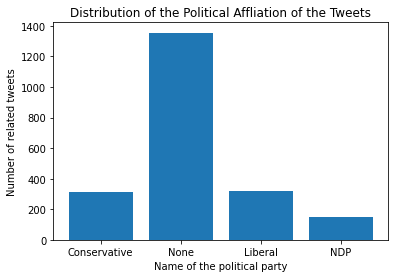

In [ ]:
#draw two bar plots for the 2019 Canadian election tweets
from collections import Counter
x = Counter(df['political_party'])
l = range(len(x.keys()))
plt.bar(l, x.values())
plt.xticks(l, x.keys())
plt.xlabel('Name of the political party')
plt.ylabel('Number of related tweets')
plt.title('Distribution of the Political Affliation of the Tweets')
plt.show()

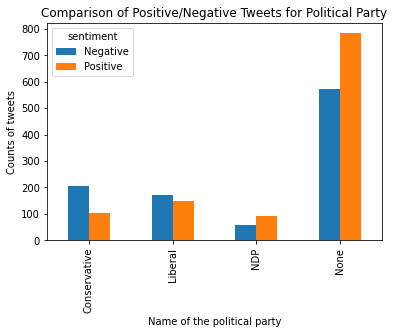

In [ ]:
df_group = df.groupby(['political_party', 'sentiment']).size()
df_group.unstack().plot.bar()
plt.xlabel('Name of the political party')
plt.ylabel('Counts of tweets')
plt.title('Comparison of Positive/Negative Tweets for Political Party')
plt.show()

The first plot above shows imbalance distribution of political party. Most of tweets are classified to 'None' as they don't have any key words in the lists while 'NDP' has the least number of related tweets. Number of tweets about Liberal and Conservative are close since they are two competitive parties in Canada.

The second plot shows the comparison of positive and negative tweets for each party. Number of negative tweets about conservative party is twice as much as positive tweets. And Ndp has much more positive tweets than negative.

###**2.2 Exploratory analysis for sentiments dataset**

Present a graphical figure that visualizes some aspects of the generic tweets from sentiment dataset.

In [ ]:
df1['sentiment'].value_counts()

Negative    71419
Positive    59236
Name: sentiment, dtype: int64

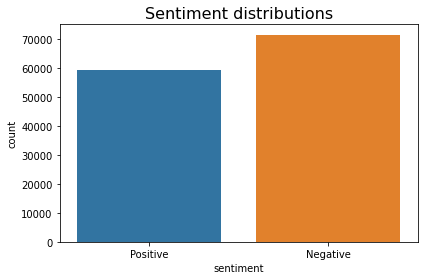

In [ ]:
#draw a bar plot
s1 = sns.countplot(x='sentiment',data=df1)
s1.axes.set_title('Sentiment distributions',fontsize=16)
plt.tight_layout()
plt.show()

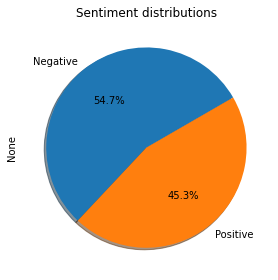

In [ ]:
#draw a pie plot
df1_group = df1.groupby(['sentiment']).size()
df1_group.plot.pie(autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Sentiment distributions')
plt.tight_layout()
plt.show()

# **3. Model preparation**

###**3.1 Preparation for generic tweets from *Sentiment.csv***

In [ ]:
df1=pd.read_csv('df1.csv')

In [ ]:
# Label the target variable, 1 for posotive and 0 for negative
le = LabelEncoder()
df1['sentiment']=le.fit_transform(df1['sentiment'])

In [ ]:
# Split the generic tweets randomly into training data (70%) and test data (30%). 
from sklearn.model_selection import train_test_split
x = df1['text']
y = df1['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=415)

Try two different types of features, word frequency (WF) and TF-IDF.

In [ ]:
# Use the positive texts in training data to do feature selecting
# Select the top 1000 words that appears most in the positive words
feature = pd.DataFrame()
feature['xt']=x_train
feature['target']=y_train
grouped = feature.groupby('target')
posit = grouped.get_group(1)


In [ ]:
# WF
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(posit['xt'])
array_WF = vectorizer.transform(x).toarray()

In [ ]:
WF = pd.DataFrame(array_WF,columns=vectorizer.get_feature_names(),index=y.index)
WF['target']=y
WF.head()

,000,10,100,11,12,15,17,1st,20,24,25,2nd,30,420,50,80,abl,absolut,account,act,actual,ad,add,addict,ador,afternoon,age,ago,agre,ah,ahead,ahh,ahhh,air,album,almost,alon,along,alreadi,alright,...,wit,without,woke,women,wonder,woo,woot,word,work,world,worri,worth,would,wow,write,wrong,www,xd,xoxo,xx,xxx,ya,yay,ye,yea,yeah,year,yep,yesterday,yet,yo,young,youtub,yr,yum,yummi,yup,ºðÿ,ðÿ,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
WF_x_train, WF_x_test, WF_y_train, WF_y_test = train_test_split(WF.drop(['target'],axis=1), WF['target'], test_size=0.3, random_state=415)

In [ ]:
# TF-IDF
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None ,max_features=1000)
vectorizer3.fit(posit['xt'])
array_TFIDF = vectorizer3.transform(x).toarray()

In [ ]:
TFIDF = pd.DataFrame(array_TFIDF,columns=vectorizer.get_feature_names(),index=y.index)
TFIDF['target']=y
TFIDF.head()

,000,10,100,11,12,15,17,1st,20,24,25,2nd,30,420,50,80,abl,absolut,account,act,actual,ad,add,addict,ador,afternoon,age,ago,agre,ah,ahead,ahh,ahhh,air,album,almost,alon,along,alreadi,alright,...,wit,without,woke,women,wonder,woo,woot,word,work,world,worri,worth,would,wow,write,wrong,www,xd,xoxo,xx,xxx,ya,yay,ye,yea,yeah,year,yep,yesterday,yet,yo,young,youtub,yr,yum,yummi,yup,ºðÿ,ðÿ,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test = train_test_split(TFIDF.drop(['target'],axis=1), TFIDF['target'], test_size=0.3, random_state=415)

###**3.2 Preparation for 2019 Canadian elections data**

In [ ]:
df0=pd.read_csv('df.csv')

# Label the target variable, 1 for posotive and 0 for negative
le = LabelEncoder()
df0['sentiment']=le.fit_transform(df0['sentiment'])

df0.head()

,sentiment,negative_reason,text
0,0,Women Reproductive right and Racism,"['rosiebarton', 'instead', 'suggest', 'agre', ..."
1,1,NaN,"['allwomanspacewalk', 'real', 'n', 'space_st',..."
2,0,Economy,"['brantford', 'go', 'cost', '94', 'billion', '..."
3,1,NaN,"['canada', 'canadaelection2019', 'canadavot', ..."
4,0,Economy,"['canada', 'taxpay', 'sick', 'tire', 'hard', '..."


In [ ]:
# Word frequency analysis 
array_WF_df0 = vectorizer.transform(df0['text']).toarray()

# Creat a new dataframe
df0_WF = pd.DataFrame(array_WF_df0,columns=vectorizer.get_feature_names())
df0_WF['target']=df0['sentiment']
df0_WF.head()

,000,10,100,11,12,15,17,1st,20,24,25,2nd,30,420,50,80,abl,absolut,account,act,actual,ad,add,addict,ador,afternoon,age,ago,agre,ah,ahead,ahh,ahhh,air,album,almost,alon,along,alreadi,alright,...,wit,without,woke,women,wonder,woo,woot,word,work,world,worri,worth,would,wow,write,wrong,www,xd,xoxo,xx,xxx,ya,yay,ye,yea,yeah,year,yep,yesterday,yet,yo,young,youtub,yr,yum,yummi,yup,ºðÿ,ðÿ,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **4. Model implementation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.svm import SVC as svc
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from xgboost.sklearn import XGBClassifier as xgb



In [ ]:
def tune(model, param_grid, x_train, y_train):

  #Train models on the training data, tune the hyperparameters with 3 folds cross-validation
  
  grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
  grid_search.fit(x_train.sample(9000, random_state=10), y_train.sample(9000, random_state=10))
  print(grid_search.best_estimator_)

In [ ]:
def run(model, x_train, x_test, y_train, y_test):

  #Then apply the model to the test data to obtain an accuracy value
  
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)

  print("Accuracy: {0}".format(accuracy))
  print('--------------------------\n ')

###**4.1 Model tuning**
Use Dataset from Sentiment.csv to do the model implementation.


Try multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)).

Try two different types of features, word frequency (WF) and TF-IDF. 


**4.1.1 Logistic Regression**

In [ ]:
#logistic regression-WF
param_grid_lr = [{'C':[0.1, 0.5, 1],'solver':['lbfgs', 'sag', 'liblinear', 'newton-cg', 'saga']}]
tune(lr(max_iter=200), param_grid_lr, WF_x_train, WF_y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
run(lr(max_iter=200, C=1, solver='lbfgs'), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.7322244049289487
--------------------------
 


In [ ]:
#logistic regression-TFIDF
tune(lr(max_iter=800), param_grid_lr, TFIDF_x_train, TFIDF_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
run(lr(max_iter=800, C=0.1, solver='lbfgs'), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

Accuracy: 0.7319182590504375
--------------------------
 


**4.1.2 KNN**

In [ ]:
#kNN-WF
param_grid_knn = [{'n_neighbors':[5, 9, 13, 17]}, {'weights':['uniform','distance']}]
tune(knn(), param_grid_knn, WF_x_train, WF_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [ ]:
run(knn(n_neighbors=5, weights='distance'), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.6755619052478506
--------------------------
 


In [ ]:
#kNN-TFIDF
tune(knn(), param_grid_knn, TFIDF_x_train, TFIDF_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


**4.1.3 Multinomial Naive Bayes**

In [ ]:
#Multinomial Naive Bayes-WF
param_grid_mnb = [{'alpha':[1, 2, 3, 4, 5]}]
tune(mnb(), param_grid_mnb, WF_x_train, WF_y_train)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)


In [ ]:
run(mnb(alpha=3), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.725004464627395
--------------------------
 


In [ ]:
#Multinomial Naive Bayes-TFIDF
tune(mnb(), param_grid_mnb, TFIDF_x_train, TFIDF_y_train)


MultinomialNB(alpha=4, class_prior=None, fit_prior=True)


In [ ]:
run(mnb(alpha=4), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

Accuracy: 0.7187029619613746
--------------------------
 


**4.1.4 Support Vector Machine**

In [ ]:
param_grid_svc = [{'C':[0.5, 1, 2], 'kernel':['poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}]

In [ ]:
tune(svc(), param_grid_svc, WF_x_train, WF_y_train)      

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#SVC-WF
run(svc(max_iter=900, C=1, kernel='rbf', gamma='scale'), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.5256524734035768
--------------------------
 


In [ ]:
#SVC-TFIDF
run(svc(max_iter=300, C=1, gamma='scale', kernel='rbf'), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.5320050003826824
--------------------------
 


**4.1.5 Decision Tree**

In [ ]:
#decision trees - WF
param_grid_dt = [{'max_depth':[30, 50, 80],
                  'max_features':[0.8, 0.5],
                  'min_samples_split':[3, 5, 8],
                  'min_samples_leaf':[2,3,5]}]

tune(dt(splitter='random'), param_grid_dt, WF_x_train, WF_y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=80, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


In [ ]:
run(dt(max_depth=80, max_features=0.5,min_samples_leaf=5, min_samples_split=3), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.6804092149909432
--------------------------
 


In [ ]:
#decision trees - TFIDF
tune(dt(splitter='random'), param_grid_dt, TFIDF_x_train, TFIDF_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=80, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


In [ ]:
run(dt(max_depth=80, max_features=0.8, min_samples_leaf=5, min_samples_split=8), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

Accuracy: 0.6805878000867414
--------------------------
 


**4.1.6 Random Forest**

In [ ]:
#Random Forest-WF
param_grid_rf = [{'n_estimators': [80, 100, 120],
                  'max_depth':[80], 
                  'min_samples_split':[3, 5, 8],
                  'min_samples_leaf':[5], 
                  'max_features': [0.8, 0.5, 'auto']}]
                  
tune(rf(), param_grid_rf, WF_x_train, WF_y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
run(rf(n_estimators=120, max_depth=80, max_features='auto',min_samples_leaf=5, min_samples_split=3), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.722555297599306
--------------------------
 


In [ ]:
#Random Forest-TFIDF
tune(rf(), param_grid_rf, TFIDF_x_train, TFIDF_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
run(rf(n_estimators=100, max_depth=80, max_features='auto', min_samples_leaf=5, min_samples_split=3), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

Accuracy: 0.7209225195805802
--------------------------
 


**4.1.7 XGBoost**

In [ ]:
#XGBoost-WF
param_grid_xgb = [{'n_estimator':[80,100,120], 
                  'max_depth':[3,6,9],
                  'subsample':[0.8]}]
tune(xgb(), param_grid_xgb, WF_x_train, WF_y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)


In [ ]:
run(xgb(n_estimator=100,max_depth=3), WF_x_train, WF_x_test, WF_y_train, WF_y_test)

Accuracy: 0.6699747429650228
--------------------------
 


In [ ]:
#XGBoost-TFIDF
param_grid_xgb = [{'n_estimator':[80,100,120], 
                  'max_depth':[3,6,9],
                  'subsample':[0.8]}]
tune(xgb(), param_grid_xgb, TFIDF_x_train, TFIDF_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimator=80,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)


In [ ]:
run(xgb(max_depth=9,n_estimator=80), TFIDF_x_train, TFIDF_x_test, TFIDF_y_train, TFIDF_y_test)

Accuracy: 0.7068908334821542
--------------------------
 


###**4.2 Sentiment prediction on Canadian election data**

Choose the logistic regression model (which has the best accuracy performance in section 4.1) to predict the sentiment classifications of the Canadian elections data.

In [ ]:
model1 = lr(max_iter=200, C=1, solver='lbfgs')
model1.fit(WF_x_train, WF_y_train)
predictions = model1.predict(df0_WF.drop(['target'],axis=1))
accuracy = accuracy_score(df0_WF['target'], predictions)
print('percent: {:.3%}'.format(accuracy))

percent: 58.884%


In [ ]:
pd.DataFrame(cm(df0_WF['target'],predictions), columns=['Predicted Negative','Predicted Positive'], index=['True Negative','True Positive'])

,Predicted Negative,Predicted Positive
True Negative,627,379
True Positive,498,629


###**4.3 Negative reasons prediction for Canadian election dataset** 

In [ ]:
# Creat a new dataframe without sentiment classifications column and positive rows.
df_nega = df0.drop(['sentiment'],axis=1)
df_nega = df_nega.dropna(subset=['negative_reason'])
df_nega.reset_index(inplace = True,drop = True)

In [ ]:
# Combine similar reasons into fewer categories.
# Reasons with small number are grouped into one category called 'Minority' which is labeled '0'.
new_label = {'Healthcare':0,
             'Healthcare and Marijuana':0,
             'Privilege':0,
             'Women Reproductive right and Racism':0,
             'Separation':0,
             'Economy':0,
             'Climate Problem':0,
             'Tell lies':1,
             'Scandal':2,
             'Others':3}

# Label Encoding the target variable
df_nega.loc[:,'target'] = df_nega.loc[:,'negative_reason'].map(new_label)
df_nega.loc[:,'target']=df_nega.loc[:,'target'].astype(int)
df_nega.head()       

,negative_reason,text,target
0,Women Reproductive right and Racism,"['rosiebarton', 'instead', 'suggest', 'agre', ...",0
1,Economy,"['brantford', 'go', 'cost', '94', 'billion', '...",0
2,Economy,"['canada', 'taxpay', 'sick', 'tire', 'hard', '...",0
3,Others,"['canadavotes2019', 'elxn43', 'cdnpoli', 'fact...",3
4,Others,"['chooseforward', 'cdnpoli', 'elxn43', 'ncanad...",3


In [ ]:
# Word Embedding
tokenized_sentences = [sentence.split() for sentence in df_nega['text']]
model = word2vec.Word2Vec(tokenized_sentences, size=200, min_count=1)

In [ ]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split(' ')
    for word in text:
        vec += model.wv[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [ ]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 200) for z in df_nega['text']])    

In [ ]:
df_nega_WE = pd.DataFrame(array_wordEmbedding)
df_nega_WE['target']=df_nega['target']
df_nega_WE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,target
0,0.006376,0.005258,0.001816,-0.001518,0.027018,0.020251,0.029627,0.024837,0.023384,0.012971,-0.026742,-0.034897,0.021721,0.012008,0.016009,-0.002964,0.012291,0.005718,-0.003498,-0.002650,0.021894,0.010211,0.034821,0.024931,-0.006210,-0.004093,0.014061,-0.011625,0.002504,-0.015509,0.015610,-0.015492,-0.020248,0.013042,-0.003906,0.011750,0.007672,-0.003371,0.007430,0.002913,...,0.017745,0.011202,-0.013597,0.007706,-0.004855,0.019582,0.006863,0.018260,-0.001241,0.012472,0.014812,0.012981,-0.030161,-0.005920,0.021539,-0.006432,0.026588,0.009885,0.010824,0.000516,-0.007068,0.014737,0.015202,0.009272,-0.048296,0.003075,0.003949,-0.007667,-0.011843,-0.011868,0.006952,0.030034,-0.005313,0.011219,0.011717,-0.007342,0.001493,-0.018305,-0.009584,0
1,0.005696,0.004447,0.001311,-0.001176,0.022255,0.017240,0.024072,0.020921,0.019329,0.011765,-0.022594,-0.029123,0.018776,0.010681,0.013979,-0.002869,0.010182,0.004897,-0.003446,-0.002687,0.018238,0.008468,0.029485,0.021276,-0.005712,-0.004343,0.012078,-0.010369,0.002431,-0.013313,0.013130,-0.013724,-0.017371,0.012104,-0.002966,0.009742,0.006684,-0.003027,0.006794,0.001671,...,0.014976,0.009950,-0.011635,0.007207,-0.004625,0.016674,0.006445,0.016120,-0.000220,0.009306,0.012165,0.010484,-0.025366,-0.005306,0.017988,-0.004414,0.021972,0.008225,0.009914,0.000357,-0.006641,0.011671,0.013086,0.008565,-0.040668,0.002784,0.003706,-0.006019,-0.009396,-0.010864,0.005890,0.024944,-0.004204,0.010236,0.010055,-0.006252,0.001644,-0.016084,-0.007899,0
2,0.002905,0.002917,0.000312,-0.000685,0.013162,0.010035,0.014858,0.013708,0.012493,0.006218,-0.013298,-0.017817,0.011302,0.005984,0.008562,-0.001786,0.006468,0.002615,-0.001383,-0.001338,0.011114,0.005173,0.017972,0.013010,-0.003165,-0.002120,0.006750,-0.005935,0.000445,-0.007751,0.007795,-0.008119,-0.010268,0.006761,-0.002567,0.006344,0.004203,-0.001298,0.004150,0.001444,...,0.009062,0.005449,-0.006882,0.004362,-0.002414,0.009891,0.003381,0.008776,-0.000489,0.005943,0.007676,0.006835,-0.014901,-0.003426,0.010544,-0.002672,0.013653,0.005379,0.005422,0.000614,-0.003564,0.006864,0.007680,0.005069,-0.024403,0.001755,0.002220,-0.004263,-0.006072,-0.005856,0.003799,0.015470,-0.002323,0.005923,0.005867,-0.004028,0.000590,-0.009018,-0.004873,0
3,0.004201,0.003590,0.000911,-0.000491,0.015251,0.011009,0.016513,0.013758,0.013513,0.007587,-0.015685,-0.019696,0.012278,0.006523,0.008984,-0.001794,0.007297,0.003415,-0.002019,-0.001357,0.012055,0.006090,0.019859,0.014034,-0.003607,-0.002238,0.008026,-0.006442,0.001771,-0.008545,0.008542,-0.008445,-0.010972,0.007757,-0.002246,0.006926,0.004596,-0.001718,0.005015,0.001718,...,0.010362,0.006413,-0.007912,0.005007,-0.003007,0.011130,0.003531,0.010745,-0.000614,0.006449,0.008622,0.007432,-0.016837,-0.003288,0.011778,-0.003166,0.015152,0.005461,0.006433,0.000692,-0.003836,0.008289,0.008406,0.005612,-0.027909,0.002159,0.002238,-0.004768,-0.006370,-0.006801,0.003830,0.017404,-0.003193,0.006461,0.006710,-0.003985,0.000712,-0.010159,-0.006012,3
4,0.004649,0.003099,0.001801,-0.000941,0.017931,0.013781,0.019983,0.016512,0.015883,0.009163,-0.017944,-0.023737,0.014491,0.008338,0.011228,-0.001801,0.008031,0.003242,-0.002315,-0.002030,0.014536,0.007094,0.023988,0.016143,-0.004187,-0.002203,0.009249,-0.008019,0.001807,-0.010669,0.011240,-0.010240,-0.013570,0.009178,-0.003222,0.008122,0.005544,-0.001541,0.004939,0.002055,...,0.012055,0.007942,-0.009237,0.006006,-0.002747,0.012974,0.003909,0.012309,-0.000477,0.008054,0.010051,0.009214,-0.020536,-0.004263,0.014056,-0.003627,0.018292,0.006609,0.007544,-0.000074,-0.004992,0.010281,0.010189,0.006161,-0.033410,0.002028,0.003517,-0.004603,-0.007265,-0.008591,0.004345,0.020002,-0.003427,0.007478,0.007689,-0.005012,0.001500,-0.

In [ ]:
# Split tweets randomly into train data (70%) and test data (30%)
from sklearn.model_selection import train_test_split
x = df_nega_WE.drop(['target'],axis=1)
y = df_nega_WE['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=228)

Choose three algorithms from classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), train multi-class classification models to predict the reason for the negative tweets.

**4.3.1 Logistic Regression**

In [ ]:
def tune2(model, param_grid, x_train, y_train):
  #Train models on the training data, tune the hyperparameters with 3 folds cross-validation
  grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
  grid_search.fit(x_train, y_train)
  print(grid_search.best_estimator_)

In [ ]:
c = np.arange(0.001, 0.1, 0.005).tolist()
param_grid_lr = [{'C':c,'solver':['lbfgs', 'sag', 'liblinear', 'newton-cg', 'saga']}]
tune2(lr(multi_class='ovr'), param_grid_lr, x_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
run(lr(multi_class='ovr',C=0.001,solver='lbfgs'),x_train, x_test, y_train, y_test)

Accuracy: 0.35313531353135313
--------------------------
 


**4.3.2 SVC**

In [ ]:
param_grid_svc = [{'C':[0.5, 1, 2], 'kernel':['poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}]

tune2(svc(), param_grid_svc, x_train, y_train) 

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
run(svc(C=0.5,kernel='poly',gamma='scale'),x_train, x_test, y_train, y_test)

Accuracy: 0.35313531353135313
--------------------------
 


**4.3.3 XGBoost**

In [ ]:
param_grid_xgb = [{'n_estimator':[50, 100, 200, 400], 
                  'max_depth':[3,6,9],
                  'learning_rate':[0.1, 0.2, 0.3]}]
tune2(xgb(), param_grid_xgb, x_train, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=50,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [ ]:
run(xgb(learning_rate=0.1,n_estimator=50, max_depth=3),x_train, x_test, y_train, y_test)

Accuracy: 0.39603960396039606
--------------------------
 


# **5. Results and Discussions**

###**5.1 Model 1** 
To visualize the sentiment prediction results and the true sentiment, bar plots and confusion matrixs are plotted for each of the 3 parties. 

A confusion matrix shows each combination of the true and predicted classes for a test data set.
These matrixs help us evaluate the accuracy of the classification.



As far as I'm concerned, NLP analytics based on tweets is useful for political parties during election campaigns. The evaluation of sentiment analysis on each parties indicates that the highest ratio of positive to negative support is for New Democratic party, but their total support base is much smaller than the Liberals or Conservatives. Liberal and conservative parties have large support base. And liberal party also holds relatively large positive percentage among people concerned about while the conservative party has a significantly smaller ratio of positive to negative support, which could explain why the Liberal party won the election with a majority government.
 

In [ ]:
# Creat a new dataframe for the prediction result
result1 = pd.DataFrame(predictions, columns=['Predicted'])
result1['True'] = df0_WF['target']
result1['political_party'] = df['political_party']

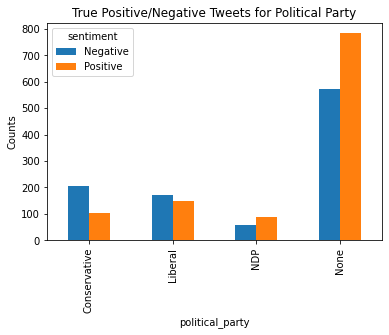

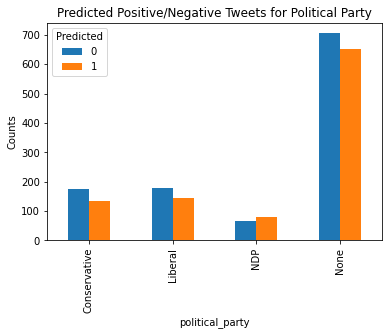

In [ ]:
df_group = df.groupby(['political_party', 'sentiment']).size()
df_group.unstack().plot.bar()
plt.ylabel('Counts')
plt.title('True Positive/Negative Tweets for Political Party')

result1_group = result1.groupby(['political_party', 'Predicted']).size()
result1_group.unstack().plot.bar()
plt.ylabel('Counts')
plt.title('Predicted Positive/Negative Tweets for Political Party')
plt.show()

Accuracy of Liberal Party: percent: 54.517%
---------------------------------------------


,Predicted Negative,Predicted Positive
True Negative,101,70
True Positive,76,74


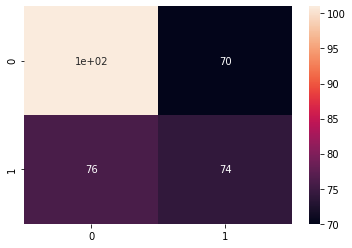

In [ ]:
# Sentiment prediction results for Liberal Party
liber = result1.groupby(by=['political_party']).get_group('Liberal')
print('Accuracy of Liberal Party:', 'percent: {:.3%}'.format(accuracy_score(liber['True'], liber['Predicted'])))
print('---------------------------------------------')
sns.heatmap(cm(liber['True'],liber['Predicted']),annot=True)
pd.DataFrame(cm(liber['True'],liber['Predicted']), columns=['Predicted Negative','Predicted Positive'], index=['True Negative','True Positive'])

Accuracy of Liberal Party: percent: 58.065%
---------------------------------------------


,Predicted Negative,Predicted Positive
True Negative,126,80
True Positive,50,54


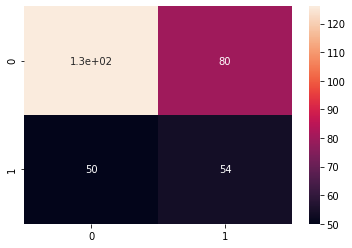

In [ ]:
# Sentiment prediction results for Conservative Party
conserv = result1.groupby(by=['political_party']).get_group('Conservative')
print('Accuracy of Liberal Party:', 'percent: {:.3%}'.format(accuracy_score(conserv['True'],conserv['Predicted'])))
print('---------------------------------------------')
sns.heatmap(cm(conserv['True'],conserv['Predicted']),annot=True)
pd.DataFrame(cm(conserv['True'],conserv['Predicted']), columns=['Predicted Negative','Predicted Positive'], index=['True Negative','True Positive'])

Accuracy of Liberal Party: percent: 65.986%
---------------------------------------------


,Predicted Negative,Predicted Positive
True Negative,37,20
True Positive,30,60


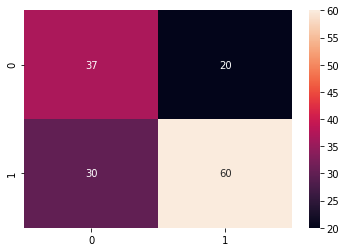

In [ ]:
# Sentiment prediction results for NDP Party
ndp = result1.groupby(by=['political_party']).get_group('NDP')
print('Accuracy of Liberal Party:', 'percent: {:.3%}'.format(accuracy_score(ndp['True'],ndp['Predicted'])))
print('---------------------------------------------')
sns.heatmap(cm(ndp['True'],ndp['Predicted']),annot=True)
pd.DataFrame(cm(ndp['True'],ndp['Predicted']), columns=['Predicted Negative','Predicted Positive'], index=['True Negative','True Positive'])

The predictions don't match the sentiment label very well. There are some ways we can do to improve the accuracy. On the one hand, to improve the model performance, gathering more knowledge and theories to support the tuning and adjusting on learning model. On the other hand, to increase the accuracy, data cleaning and feature selecting process should be optimized. Some meaningless words like 'xx', 'ya', 'yo' etc. still appear in the cleaned tweets and some high frequency words having little contribution on sentiment estimate as they appear on both positive and negative tweets, are considered significant features by CountVectorizer.

###**5.2 Model 2**

Based on the model that worked best in section 4.3, a confusion matrix and a histogram are plotted to show distributions of negative reasons.

In [ ]:
model2 = xgb(learning_rate=0.1,n_estimator=50, max_depth=3)
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)

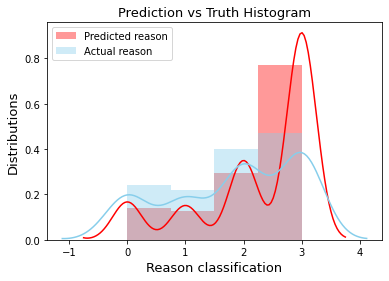

In [ ]:
plot_result = pd.DataFrame(y_test)
plot_result['pred'] = predictions
plot_result.columns=['actual','pred']

font_size=8
label_size=6
sns.distplot(plot_result['pred'], bins=4,  color="red",label='Predicted reason')
ax=sns.distplot(plot_result['actual'], bins=4, color="skyblue",label='Actual reason')
plt.legend()
ax.axes.set_title('Prediction vs Truth Histogram',fontsize=font_size+5);
ax.set_xlabel('Reason classification',fontsize=font_size+5);
ax.set_ylabel('Distributions',fontsize=font_size+5);

In [ ]:
pd.DataFrame(cm(y_test,predictions), 
             columns=['P_Minority','P_Tell lies','P_Scandal','P_Others'], 
             index=['T_Minority','T_Tell lies','T_Scandal','T_Others'])

,P_Minority,P_Tell lies,P_Scandal,P_Others
T_Minority,7,6,6,36
T_Tell lies,4,5,15,26
T_Scandal,8,9,37,37
T_Others,6,13,29,59


There are some reasons why the model failed to predict the correct negative reasons:
*   Some tweets criticized more than one aspect of the party, which may mislead the classification of the model. For example, No.69 is labeled 'Tell lies', but this tweet also involves money and economy. No.99 labeled 'Scandal' also criticized telling lie. 
*   Reasons with small number are grouped into one category called 'Minority'. There is no obvious similarity between them, which may cause the model mistakenly classified them to 'Others'. And the histogram above also shows that many negative tweets are mistakenly classified to 'Others' reason label.
*   Facing an imbalanced classes may be another reason. 365 out of 1007 tweets are labeled 'Others' having the largest label number. However, this 'Others' classification don't have clear key words, which may increase the learning difficulty of models.
*   The reason label is encoded with valued number from 0 to 3. However, these reasons don't constitute a comparison relationship, when '0, 1, 2, 3' are used for labeling, a comparison relationship will appear, and the distance between each labels will be different, which may affect the learning performance of the model. 


To improve the model performance, the reasons can be labeled into one hot format which can avoid the impact caused by the comparison relationship between the valued labels. Moreover, increasing the feature dimension can increase the chances that election tweets and generic tweets have same features.